## VGG16 실습

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
cifar10 = keras.datasets.cifar10

(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [3]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))

In [4]:
import matplotlib.pyplot as plt

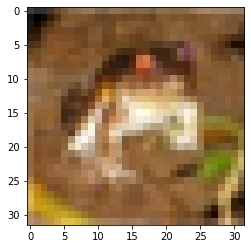

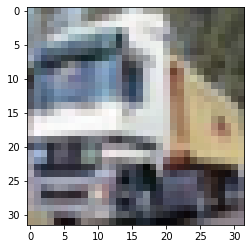

In [5]:
for image, lael in train_dataset.take(2):
  plt.figure()
  plt.imshow(image)

In [6]:
IMG_SIZE = 160

def chage_format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [7]:
train_dataset = train_dataset.map(chage_format)
test_dataset = test_dataset.map(chage_format)

In [8]:
data = train_dataset.take(1)
data

<TakeDataset shapes: ((160, 160, 3), (1,)), types: (tf.float32, tf.uint8)>

In [9]:
train_dataset.element_spec

(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(1,), dtype=tf.uint8, name=None))

### VGG16 구성

In [10]:
vgg16 = keras.applications.VGG16(weights=None,
                                 input_shape=(160, 160, 3))

vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [11]:
model = keras.applications.VGG16(include_top=False,
                                 weights=None,
                                 input_shape=(160, 160, 3))

In [12]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [13]:
new_model = keras.Sequential()
new_model.add(model)
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(4096, activation='relu'))
new_model.add(keras.layers.Dense(4096, activation='relu'))
new_model.add(keras.layers.Dense(10, activation='softmax', name='predictions'))

In [14]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              52432896  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 10)                40970     
Total params: 83,969,866
Trainable params: 83,969,866
Non-trainable params: 0
_________________________________________________________________


In [15]:
train_dataset = train_dataset.shuffle(1000).batch(64)
test_dataset = test_dataset.batch(64)

In [16]:
new_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [17]:
new_model.fit(train_dataset, epochs=10)

Epoch 1/10
782/782 [==============================] - 120s 153ms/step - loss: 2.3050 - accuracy: 0.0982
Epoch 2/10
782/782 [==============================] - 120s 153ms/step - loss: 2.3027 - accuracy: 0.0972
Epoch 3/10
782/782 [==============================] - 120s 153ms/step - loss: 2.3027 - accuracy: 0.0959
Epoch 4/10
782/782 [==============================] - 120s 153ms/step - loss: 2.3027 - accuracy: 0.0943
Epoch 5/10
782/782 [==============================] - 120s 153ms/step - loss: 2.3028 - accuracy: 0.0966
Epoch 6/10
782/782 [==============================] - 120s 153ms/step - loss: 2.3027 - accuracy: 0.0967
Epoch 7/10
782/782 [==============================] - 120s 153ms/step - loss: 2.3027 - accuracy: 0.0968
Epoch 8/10
782/782 [==============================] - 120s 153ms/step - loss: 2.3027 - accuracy: 0.0946
Epoch 9/10
782/782 [==============================] - 120s 153ms/step - loss: 2.3027 - accuracy: 0.0972
Epoch 10/10
782/782 [==============================] - 120s 153m